In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import random
import matplotlib.colors as mcolors
import random
import pandas as pd
import datetime
import io
import array,re,itertools
import numpy as np
import math

In [ ]:
import csv
csv_file =input('/content/drive/MyDrive/fb.csv ')
txt_file =input('/content/drive/MyDrive/new.txt ')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

/content/drive/MyDrive/fb.csv /content/drive/MyDrive/fb.csv
/content/drive/MyDrive/new.txt /content/drive/MyDrive/new.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

G_sampled = nx.read_edgelist(txt_file, nodetype=int, create_using=nx.DiGraph())
print (nx.info(G_sampled))

DiGraph with 4039 nodes and 88234 edges


In [ ]:
result = []
F = open('/content/drive/MyDrive/facebook_combined_Sample.txt', "w")
with open(txt_file) as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)
sample = random.sample(result, 20000)

for item in sample:
    F.write(item[0] + "\t" + item[1] + "\n")
print ("Sampled Dataset Information:")
G_sampled = nx.read_edgelist('/content/drive/MyDrive/facebook_combined_Sample.txt', nodetype=int, create_using=nx.DiGraph())
print (nx.info(G_sampled))

Sampled Dataset Information:
DiGraph with 3663 nodes and 17774 edges


In [ ]:
initial_activated_nodes = random.randint(1, 100)
nodes = list(G_sampled.nodes)
print(initial_activated_nodes)

40


In [ ]:
activated_nodes = set()
while(len(activated_nodes) != initial_activated_nodes):
    rand_idx = random.randint(1,125)
    activated_nodes.add(nodes[rand_idx-1])
print(activated_nodes)


{2819, 2308, 1539, 906, 1547, 2190, 2706, 3090, 1951, 3365, 2472, 2344, 1456, 2865, 2864, 1718, 2103, 1078, 3385, 2367, 2755, 1604, 2504, 1103, 2131, 2008, 729, 1757, 2654, 2144, 1888, 1378, 3184, 1520, 3316, 3061, 889, 2939, 1916, 1017}


In [ ]:
remaining_activation = list(activated_nodes)


In [ ]:
new_nodes=[]
while(len(remaining_activation)):
    node = remaining_activation[0]
    remaining_activation.remove(node)
    nbrs = G_sampled.neighbors(node)
    for child in nbrs:
        if child not in activated_nodes:
            prob = random.uniform(0,1)
            if prob < 0.2:
                activated_nodes.add(child)
                new_nodes.append(child)
                remaining_activation.append(child)
print(len(new_nodes))

265


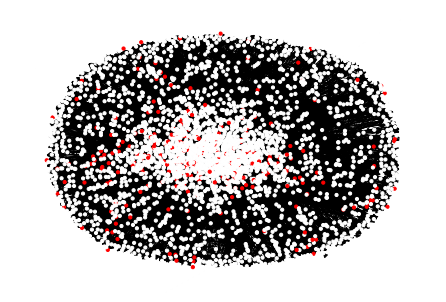

In [ ]:
colored = []
for nodes in G_sampled.nodes():
    if nodes in activated_nodes:
        colored.append('red')
    else:
        colored.append('white')
nx.draw(G_sampled, with_labels = False, node_size= 10 , node_color = colored)
